In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [9]:
df = pd.read_csv("/train.csv")  # Kaggle Titanic train file

In [10]:
df.head()
df.shape
df.dtypes
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# missing values
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [12]:
# duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [13]:
# Embarked: few missing -> fill with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-2625597839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [14]:
# Age: many missing -> fill with median (simple) or by group (advanced)
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-4051873808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [15]:
# Cabin: mostly missing -> drop or create indicator
df.drop(columns=["Cabin"], inplace=True)  # simple choice

In [16]:
categorical = ["Survived", "Pclass", "Sex", "Embarked"]
numeric = ["Age", "Fare", "SibSp", "Parch"]


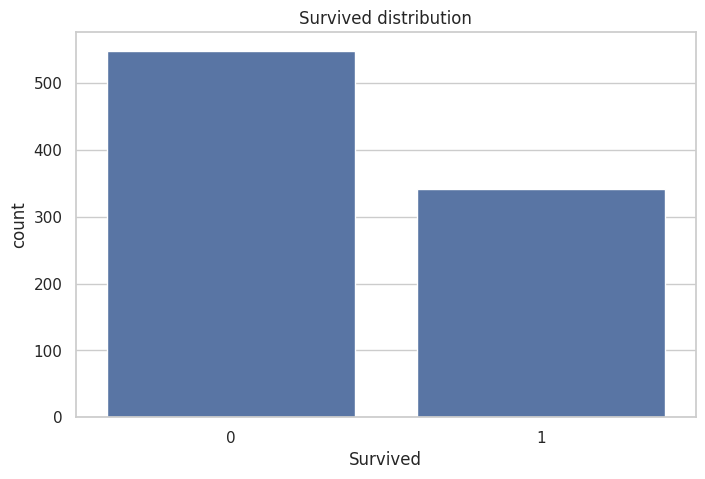

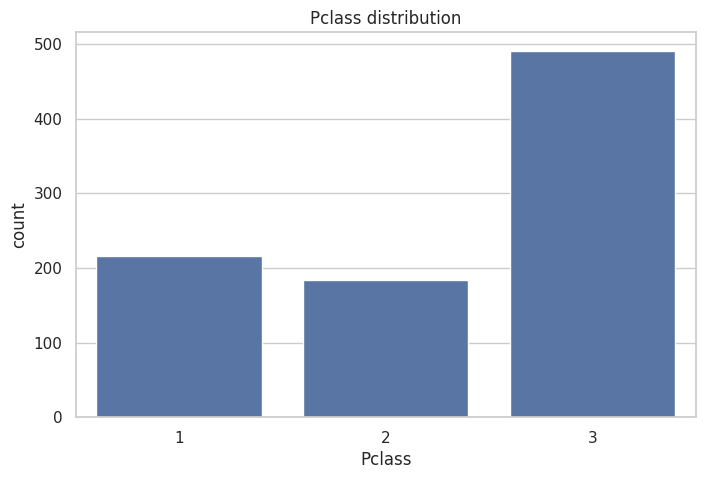

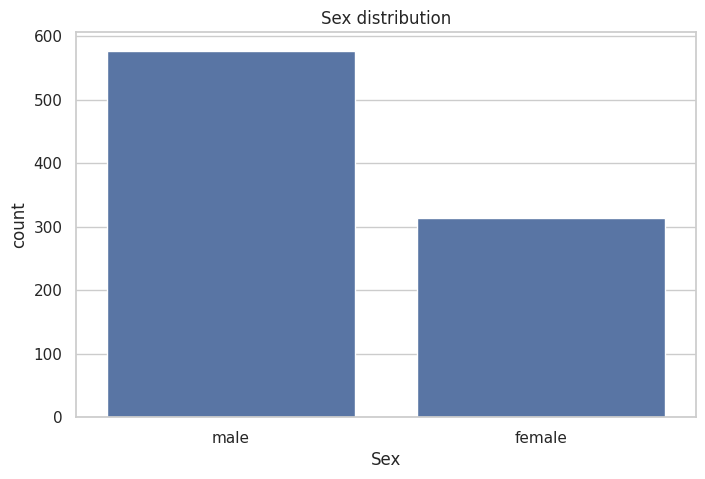

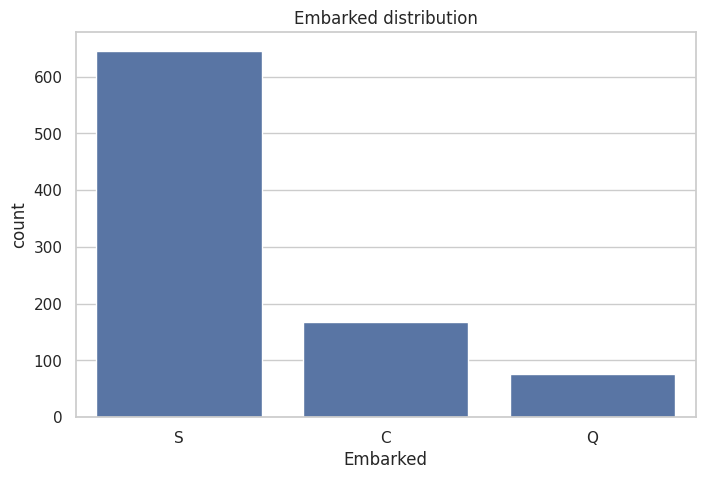

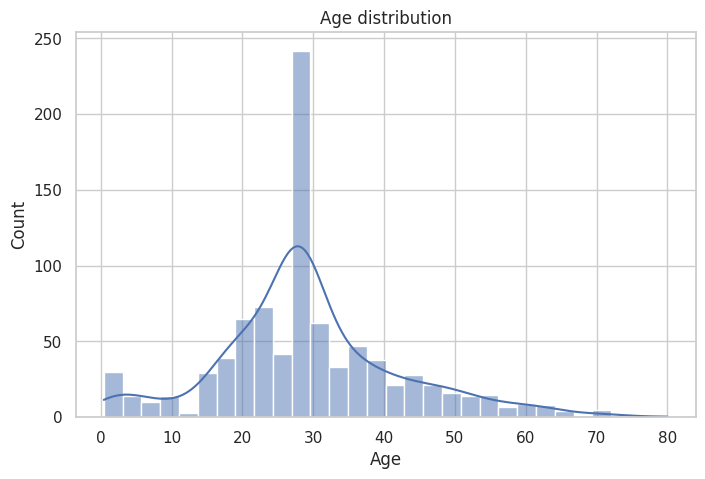

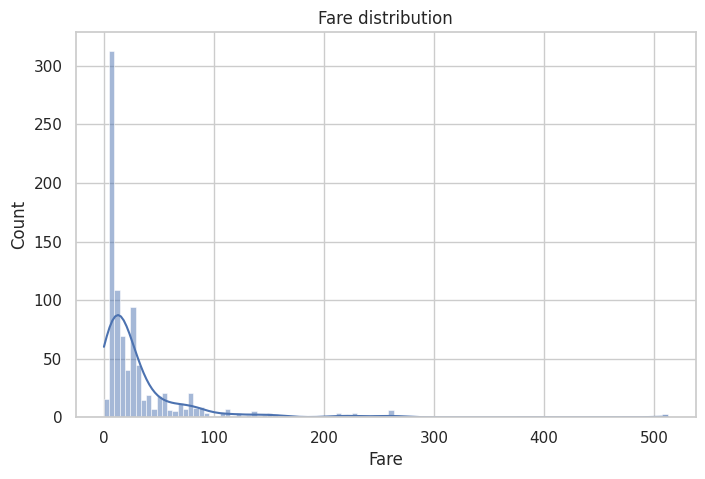

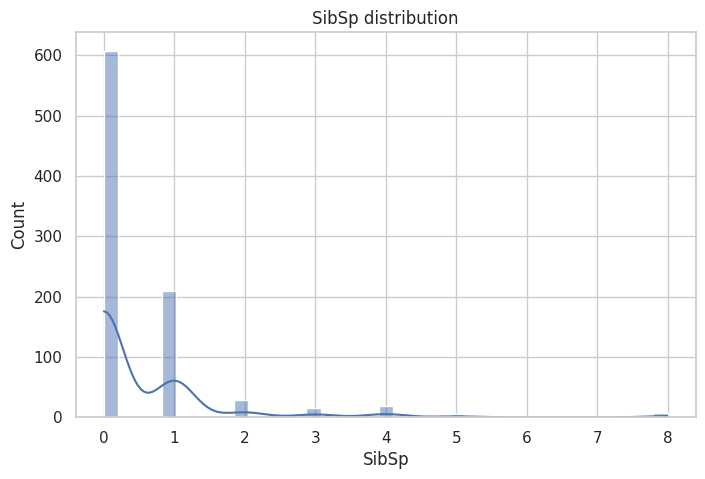

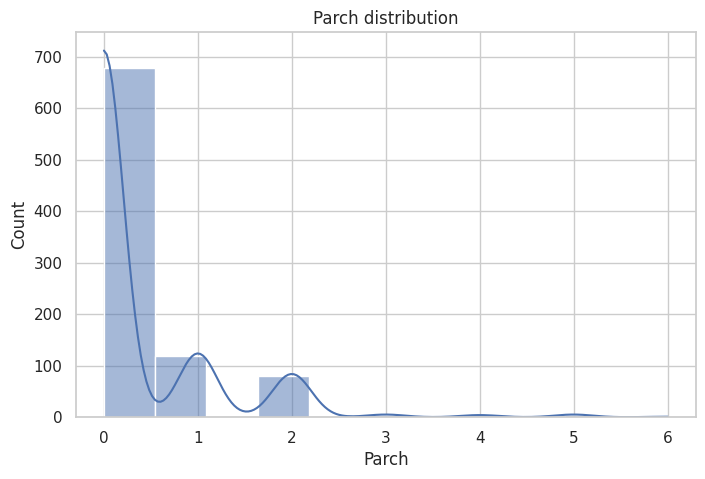

In [17]:
for col in categorical:
    sns.countplot(data=df, x=col)
    plt.title(f"{col} distribution")
    plt.show()

for col in numeric:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution")
    plt.show()

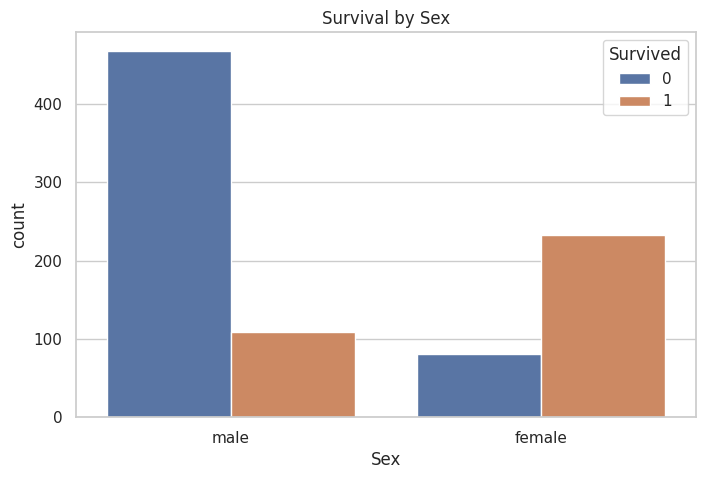

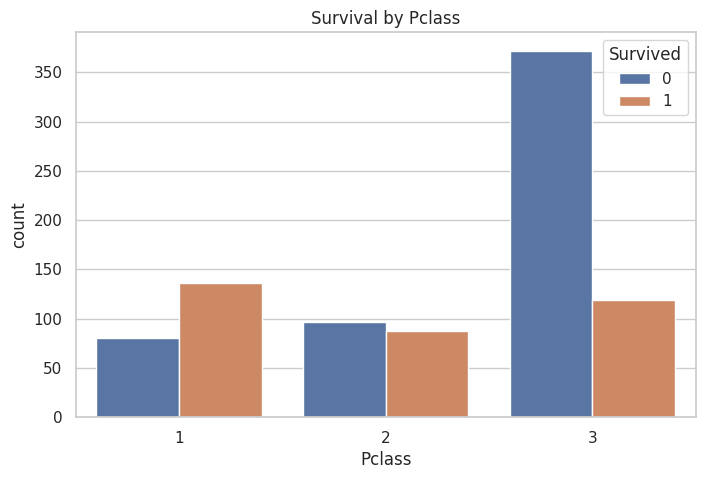

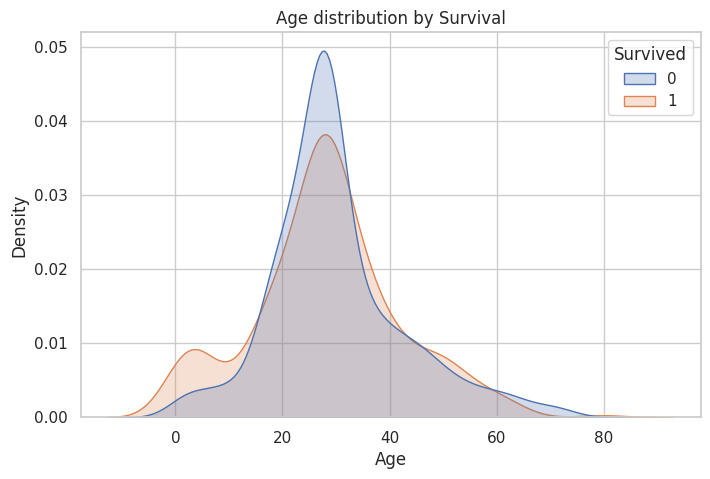

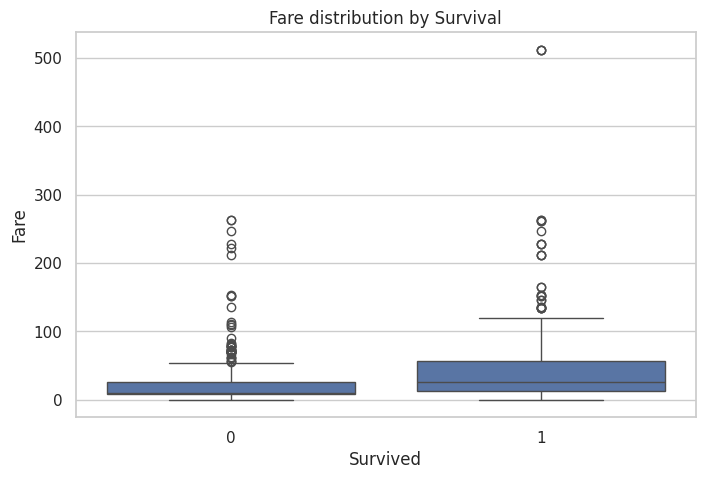

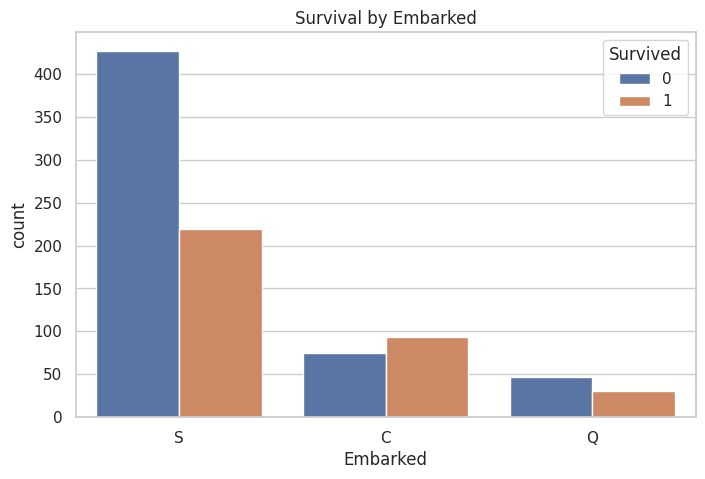

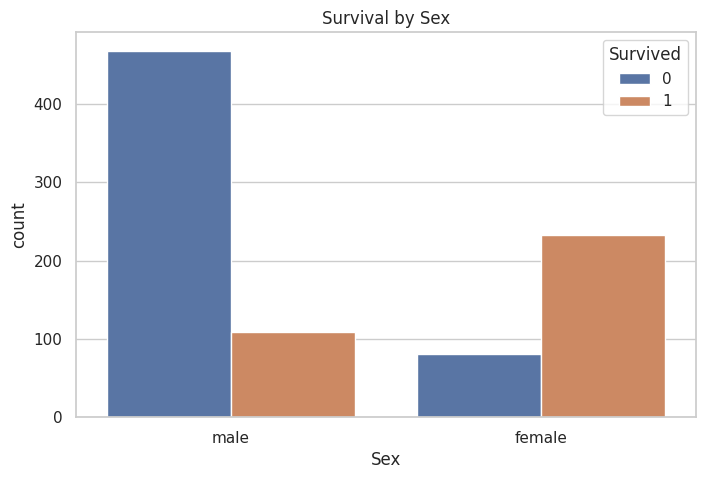

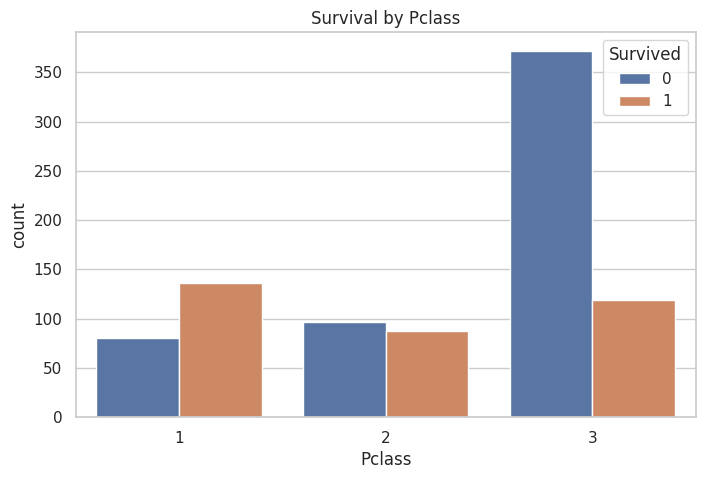

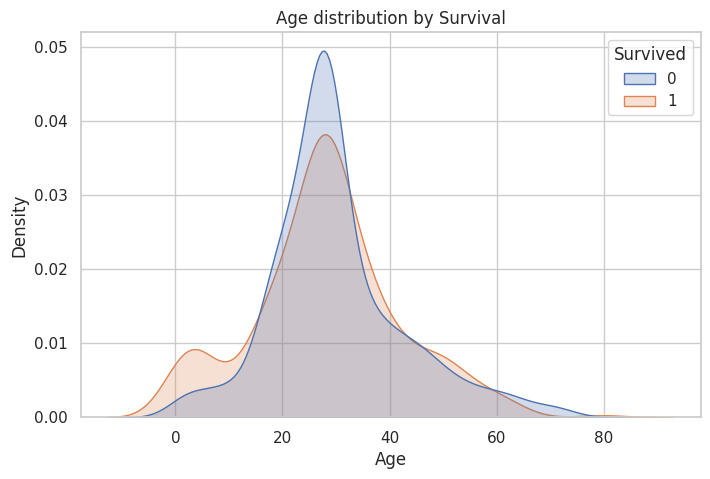

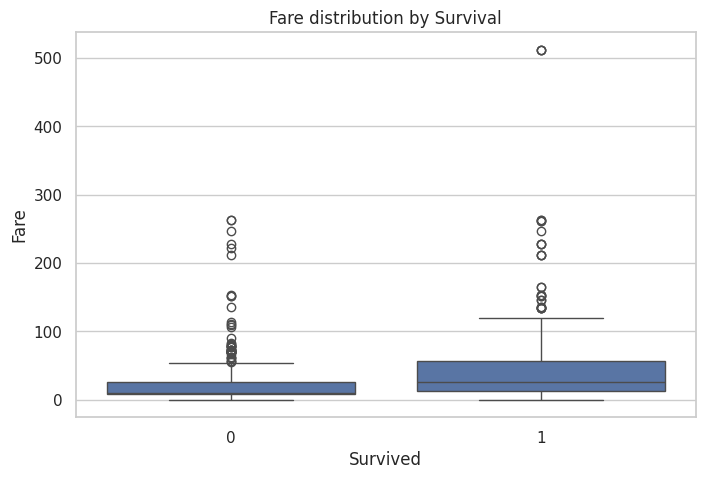

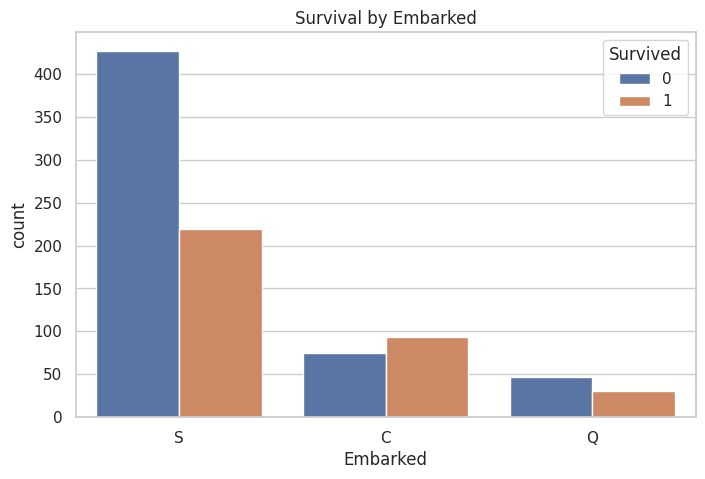

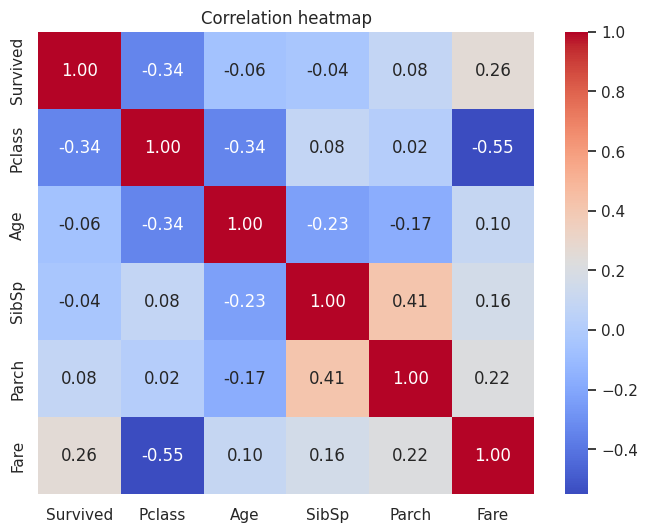

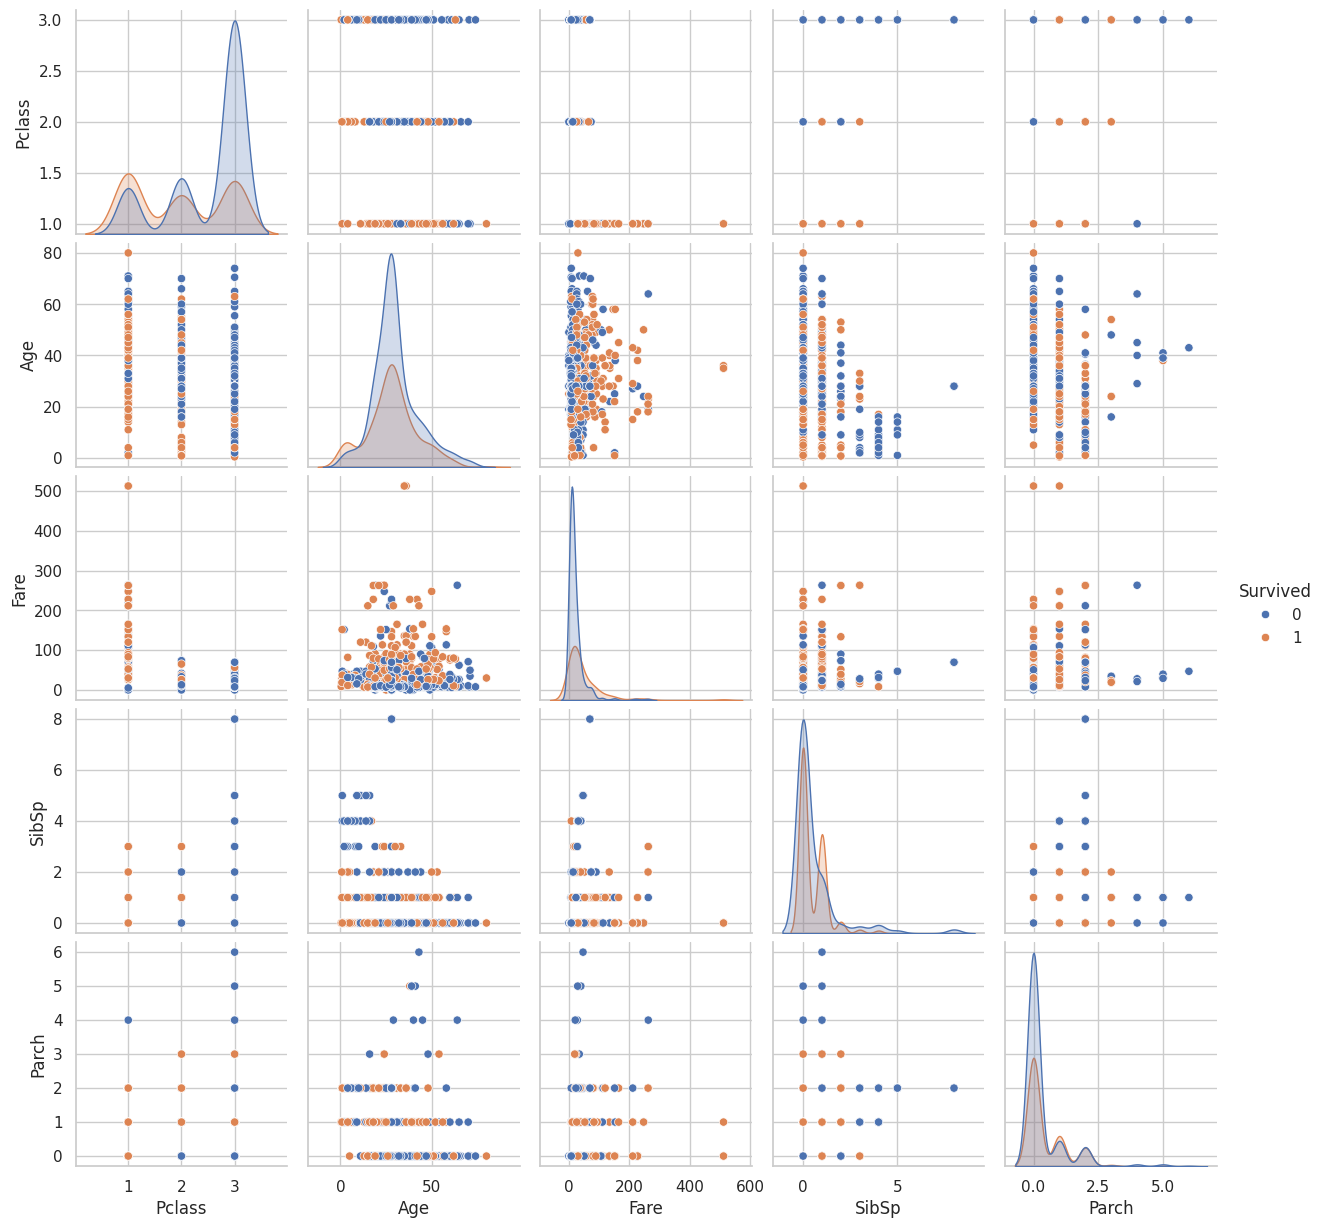

In [18]:
# Survival rate overall
df["Survived"].value_counts(normalize=True)

# Survival by sex
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()

# Survival by passenger class
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Pclass")
plt.show()

# Age distributions by survival
sns.kdeplot(data=df, x="Age", hue="Survived", common_norm=False, fill=True)
plt.title("Age distribution by Survival")
plt.show()

# Fare vs Survival
sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Fare distribution by Survival")
plt.show()

# Embarked vs Survival
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked")
plt.show()

# Survival rate overall
df["Survived"].value_counts(normalize=True)

# Survival by sex
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()

# Survival by passenger class
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Pclass")
plt.show()

# Age distributions by survival
sns.kdeplot(data=df, x="Age", hue="Survived", common_norm=False, fill=True)
plt.title("Age distribution by Survival")
plt.show()

# Fare vs Survival
sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Fare distribution by Survival")
plt.show()

# Embarked vs Survival
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

sns.pairplot(df[["Survived","Pclass","Age","Fare","SibSp","Parch"]],
             hue="Survived")
plt.show()

In [19]:
overall_survival = df["Survived"].mean()

In [21]:
family_size = df["SibSp"] + df["Parch"] + 1
df["FamilySize"] = family_size
survival_by_fam = df.groupby("FamilySize")["Survived"].mean()

In [20]:
survival_by_sex = df.groupby("Sex")["Survived"].mean()
survival_by_pclass = df.groupby("Pclass")["Survived"].mean()
survival_by_embarked = df.groupby("Embarked")["Survived"].mean()